# Introduction

Welcome to the Cyborg Math course!

In this course we will learn how to use sympy - a python package for symbolic math. The first step is to import the package

In [1]:
import sympy

Sympy's default print mode is plain text, which is very robust but not very aesthetic

In [2]:
x = sympy.Symbol('x')
(x**2+1)/(x**2-1)

(x**2 + 1)/(x**2 - 1)

We can use latex rendering to make the output nicer

In [3]:
sympy.init_printing()

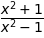

In [4]:
(x**2+1)/(x**2-1)

# Section 1 - Objects

sympy works by manipulating symbolic mathematical expressions. This is different from other packaes you might be familiar with, which manipulate collections of raw data (like numbers or strings). Here's an example of the difference between a regular calculation and a symbolic calculation. Suppose we want to calculate the square root of 8, normally, we would use

In [5]:
import math
math.sqrt(8)

In [6]:
sympy.sqrt(8)

It seems like the sympy function didn't do anything, but what it actually did was to produce a new sympy object

In [7]:
type(sympy.sqrt(8))

sympy.core.mul.Mul

Also, unlike the regular math function, which truncates the output after about 15 significant digits, sympy expressions are, in principle, accurate to infinite precision. sympy knows how to incorporate integers into symbolic expressions seamlessly

In [8]:
sympy.sqrt(8)+1

But fractions can be problematic

In [9]:
sympy.sqrt(8)+1/7

To create a fraction, we need to use the Rational object

In [10]:
sympy.sqrt(8) + sympy.Rational(1,7)

__Exercise a__

Create a sympy object that represents the fraction 1/3. Use the function below to verify your answer

In [11]:
import verify_1
answer = sympy.Rational(1,3)
verify_1.check_1a(answer)

True

We can turn symbolic numbers into floating point numbers using .n()

In [12]:
sympy.sqrt(8).n()

Though this expression is still a sympy object

In [13]:
type(sympy.sqrt(8).n())

sympy.core.numbers.Float

To turn it into a regular number, we need to use float()

In [14]:
[float(sympy.sqrt(8).n()),type(float(sympy.sqrt(8).n()))]

[2.8284271247461903, float]

sympy will by default display the last equation

In [15]:
sympy.sqrt(8)+1
sympy.sqrt(8)-1

If you want to display multiple equation, or lines before the end, use display

In [16]:
display(sympy.sqrt(8)+1)
sympy.sqrt(8)-1

# Section 2 - Symbols

Variables and unknown quantities can be represented using symbols

In [17]:
x = sympy.Symbol('x')
x

__Exercise a__

Construct a variable called "y"

In [18]:
answer = sympy.Symbol('y')
verify_1.check_2a(answer)

True

Symbols can also include greek letters

In [19]:
[sympy.Symbol('zeta'), sympy.Symbol('Sigma')]

__Exercise b__

Construct the greek variable chi

In [20]:
answer = 0
verify_1.check_2b(answer)

False

Symbols can also contain subscript

In [21]:
sympy.Symbol('a3')

__Exercise c__ 

Construct the variable alpha_3

In [22]:
answer = 0
verify_1.check_2c(answer)

False

Finally, variables can be typeset using raw latex

In [23]:
sympy.Symbol(r'\tilde{\aleph}')

__Exercise d__

Construct the variable $\mathcal{L}$

In [24]:
answer = 0
verify_1.check_2d(answer)

False

By default, sympy assumes everything is complex, so this is why it refrains from doing some obvious simplification. However, it is possible to give variables qualifiers that will enable these simplifications

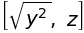

In [25]:
y = sympy.Symbol('y')
z = sympy.Symbol('z', positive=True)
[sympy.sqrt(y**2), sympy.sqrt(z**2)]

Here's another example for why assumptions are important for simplification

In [26]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">I will not be taking questions at this time <a href="https://t.co/H7KvemYuhF">pic.twitter.com/H7KvemYuhF</a></p>&mdash; Anna Hughes (@AnnaGHughes) <a href="https://twitter.com/AnnaGHughes/status/1222608360450617344?ref_src=twsrc%5Etfw">January 29, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

# Section 3 - Arithmetic

We can combine numbers and variables using the four basic arithmetica operations

In [27]:
(2*x+1)/(2*x-1)

__Exercise a__

Construct the [Mobius transformation](https://en.wikipedia.org/wiki/M%C3%B6bius_transformation)

$\frac{a z+b}{c z+d}$

In [28]:
answer = 0
verify_1.check_3a(answer)

False

Raising to a power is done using the operator **

In [29]:
x**2

__Exercise b__

Create the general expression for a Mersenne number $2^n-1$

In [30]:
answer = 0
verify_1.check_3b(answer)

False

Fractions can be separated to numerator and denominator using the fraction function

In [31]:
sympy.fraction((2*x+1)/(2*x-1))

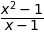

In [32]:
(x**2-1)/(x-1)

__Exercise c__

One can construct the [continued fraction](https://en.wikipedia.org/wiki/Continued_fraction) $1+\frac{1}{1+\frac{1}{1+...}}$ by using the recursion relation $a_1 = 1$, $a_{n+1} = 1+\frac{1}{a_n}$. Find the numerator of $a_{20}$

In [33]:
answer = 0
verify_1.check_3c(answer)

False

# Section 4 - Simplification and Expansion

Sometimes sympy behaves in a strange way. Consider the following example

In [34]:
(1+sympy.sqrt(5))*(1-sympy.sqrt(5))

This expression is left as is, even though we can clearly see it can be simplified. We can carry out the product by calling the expand function

In [35]:
sympy.expand((1+sympy.sqrt(5))*(1-sympy.sqrt(5)))

Conversely, sometimes we want to do the opposite (i.e. put an expanded back in fractions)

In [36]:
x**2+2*x+1

This can be done using the factor function

In [37]:
sympy.factor(x**2+2*x+1)

In general, the simplest representation of an expression can be obtained using the simplify function

In [38]:
sympy.simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

__Exercise a__

Simplify the fraction $\frac{\sqrt{3}+\sqrt{2}}{\sqrt{3}-\sqrt{2}}$ by multiplying and expanding both numerator and denominator by $\sqrt{3}+\sqrt{2}$

In [39]:
answer = 0
verify_1.check_4a(answer)

False

# Section 5 - Complex Numbers

sympy can represent complex numbers using the imaginary number sympy.I

In [40]:
[sympy.I, sympy.I**2]

Complex and real parts

In [41]:
dummy = 3+4*sympy.I
[sympy.re(dummy), sympy.im(dummy)]

Complex conjugate

In [42]:
dummy.conjugate()

Absolute magnitude

In [43]:
sympy.Abs(dummy)

Phase

In [44]:
sympy.arg(dummy)

__Exercise a__

Find the imaginary part of $(3+4i)^2$

In [45]:
answer = 0
verify_1.check_5a(answer)

False

# Section 6 - Substitution

Substitution replaces one expression with another expression

In [46]:
temp = (2*x+1)/(2*x-1)
[temp, temp.subs(x, x/2)]

subs will match an exact expression, and not mathematically equivalent expressions

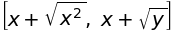

In [47]:
y = sympy.Symbol('y')
temp = sympy.sqrt(x**2)+x
[temp,temp.subs(x**2,y)]

One common pitfall is that identically looking variables might be different, and so will respond differently to subs

In [48]:
not_x = sympy.Symbol('x', complex=True)
temp = x+not_x
[temp, temp.subs(x,1)]

__Exercise a__

The Babylonians discovered a [repeated substitution](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method) to calculate the square root of a number $S$

$x_{n+1} = \frac{1}{2} \left(\frac{S}{x_n}+x_n\right)$

Suppose we want to use this method to calculate the square root of 3. Start from $x_1 = 1$ and find $x_{10}$

In [49]:
answer = 0
verify_1.check_6a(answer)

False

# Section 7 - Functions

sympy supports all elementary functions, as well as a number of non elementary functions

In [50]:
[sympy.log(x), sympy.sin(x), sympy.exp(x), sympy.gamma(x)]

Some functions have their own [simplifying functions](https://docs.sympy.org/1.5.1/tutorial/simplification.html)

In [51]:
[sympy.cos(2*x),sympy.expand_trig(sympy.cos(2*x))]

You can also define implicit function

In [52]:
F = sympy.Function('F', positive=True)
F(x)

And later substitute a different function

In [53]:
temp = F(2*x) - F(x)
temp = temp.subs(F, sympy.log)
temp

# Section 8 - Equations

sympy has an equation object

In [54]:
sympy.Eq(2*x+3,x**2)

We can solve this equation and find its roots

In [65]:
sympy.solve(sympy.Eq(2*x+3,x**2),x, dict=True)

The equation object is often unnecessary, since if we input $f(x)$, simpy will solve for $f(x) = 0$

In [56]:
sympy.solve(2*x+3-x**2,x)

Solve can't do magic, and if you give it something too complicated it will fail. 

__Exercise a__

Find the positive root of the polynomial $x^2-x-1$

In [57]:
answer = 0 
verify_1.check_8a(answer)

False

You can retrieve the left hand side or right hand side of equations

In [58]:
E = sympy.Symbol('E')
M = sympy.Symbol('M')
c = sympy.Symbol('c')
temp = sympy.Eq(E,M*c**2)
[temp, temp.lhs, temp.rhs]

# Section 9 - Conversion

Sometimes we would like to turn a symbolic expression into a normal python function. This can be achieved using lambdify

In [59]:
func = (x+1)/(x-1)
f = sympy.lambdify(x, func)
f(8)

Expressions can also be turned directly into latex

In [60]:
print(sympy.latex(func))

\frac{x + 1}{x - 1}


# Section 10 - A Worked Example

In this example we will derive the strong shock conditions in an ideal gas. We begin with the [Rankine Hugoniot conditions](https://en.wikipedia.org/wiki/Rankine%E2%80%93Hugoniot_conditions)

In [61]:
rho_1 = sympy.Symbol('rho1', positive=True) # Upstream density
rho_2 = sympy.Symbol('rho2', positive=True) # Downstream density
v_1 = sympy.Symbol('v1', positive=True) # Upstream velocity
v_2 = sympy.Symbol('v2', positive=True) # Downstream velocity
p_1 = sympy.Symbol('p1', positive=True) # Upstream pressure
p_2 = sympy.Symbol('p2', positive=True) # Downstream pressure
h_1 = sympy.Symbol('h1', positive=True) # Upstream enthalpy
h_2 = sympy.Symbol('h2', positive=True) # Downstream enthalpy
mass_conservation = sympy.Eq(rho_1*v_1, rho_2*v_2)
momentum_conservation = sympy.Eq(p_1+rho_1*v_1**2, p_2+rho_2*v_2**2)
enthalpy_conservation = sympy.Eq(h_1+v_1**2/2, h_2+v_2**2/2)
rankine_hugoniot_conditions = [mass_conservation,
                              momentum_conservation,
                              enthalpy_conservation]
rankine_hugoniot_conditions

Adaptation for an ideal gas

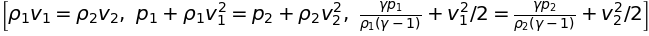

In [62]:
gamma = sympy.Symbol('gamma', positive=True) # Adiabatic index
ideal_gas_rankine_hugoniot_conditions = [itm.subs({h_1:gamma*p_1/rho_1/(gamma-1),
                                                   h_2:gamma*p_2/rho_2/(gamma-1)})
                                        for itm in rankine_hugoniot_conditions]
ideal_gas_rankine_hugoniot_conditions

sympy can solve these equations, but the result is not very insightful. A more useful approximation is the strong shock assumption, where the upstream pressure is neglected

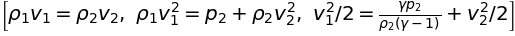

In [63]:
strong_sohck_rankine_hugoniot = [itm.subs(p_1,0) for itm in ideal_gas_rankine_hugoniot_conditions]
strong_sohck_rankine_hugoniot

Solving the system of equations to obtain the downstream values

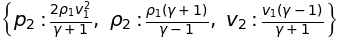

In [64]:
sympy.solve(strong_sohck_rankine_hugoniot,[p_2,rho_2,v_2],dict=True)[0]

And we reproduce one of the interesting features of strong shocks. Even when the shock is extremely strong, the shocked material is only compressed by a constant factor, that only depends on the adiabatic index

In [71]:
temp = rho_2.subs((sympy.solve(strong_sohck_rankine_hugoniot,[p_2,rho_2,v_2],dict=True)[0]))
temp = temp/rho_1
temp = temp.subs(gamma, sympy.Rational(5,3))
temp